<h1 style="color: #e3db24;">00 | Libraries and Settings</h1>

In [2]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #e3db24;">01 | Data Extraction</h1>

In [5]:
data = pd.read_csv('king_ country_ houses_aa.csv')

<h2 style="color: #ec7511;">Exploring the Data (First Impression)</h2>

In [7]:
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [8]:
data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15896,2131701410,20150427T000000,299950.0,3,2.25,1370,5000,2.0,0,0,3,7,1370,0,1990,0,98019,47.7372,-121.981,1600,7724
2272,3313600340,20140616T000000,183000.0,3,1.75,1070,8100,1.0,0,0,4,6,1070,0,1957,0,98002,47.2853,-122.220,1260,8100
14970,8691510290,20150506T000000,385000.0,3,2.50,2230,8296,2.0,0,0,3,7,2230,0,2004,0,98058,47.4386,-122.116,2480,5940
8750,9527310110,20140826T000000,445000.0,3,2.75,2180,3703,2.0,0,0,3,8,2180,0,2004,0,98011,47.7760,-122.169,2190,3963
7498,13002495,20140707T000000,295000.0,3,1.50,1640,7222,2.0,0,0,4,7,1640,0,1908,0,98108,47.5215,-122.330,1240,5100


In [9]:
data.shape

(21613, 21)

<h3 style="color: #ec1139;">Column Legend</h3>

***First Impressions***

- This dataset comprises one-year data (from May 2014 to May 2015) of house sale prices. It features 21 different columns and 21,613 rows (=houses).
- There is an id column and a date column
- Apart from that, there is numerical (continuous) data, i.e. regarding size, and also categorical data (all coded in discrete numbers)

<h2 style="color: #ec7511;">Copy as best practices</h2>

In [13]:
boston_houses = data.copy()

<h1 style="color: #e3db24;">02 | Data Cleaning</h1>

<h2 style="color: #ec7511;">Feature Selection (Dropping unnecessary features)</h2>

dropping columns if not needed etc

In [17]:
# df = df.drop(columns=['known_as', 'full_name', 

<h2 style="color: #ec7511;">Checking Null Values</h2>

In [19]:
boston_houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h2 style="color: #ec7511;">Checking Duplicates</h2>

In [21]:
boston_houses.duplicated().sum()

0

<h2 style="color: #ec7511;">Checking Empty Spaces</h2>

In [23]:
boston_houses.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [50]:
boston_houses.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

<h2 style="color: #ec7511;">Moving our target to the right</h2>

In [25]:
# our target is "price"
boston_houses = boston_houses[[col for col in boston_houses.columns if col != 'price'] + ['price']]

In [38]:
boston_houses

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


<h1 style="color: #e3db24;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #ec7511;">Statistical information about the numerical columns</h2>

In [46]:
round(boston_houses.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21613.0,3.370000e+00,9.300000e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.110000e+00,7.700000e-01,0.00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184400e+02,290.00,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.00,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21613.0,7.660000e+00,1.180000e+00,1.00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


+ Measures of central tendency - Mean, median, mode
+ Measures of spread / dispersion - SD, var, range, quartiles, percentiles
+ Meaures of frequency - Frequency

+ **Range:** defines the difference between the highest and lowest values.
+ **Variance**: measures how far each number in the set is from the mean and thus from every other number in the set.
+ **Standard deviation:** The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
+ **Quartiles:** A quartile is a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations.
+ **Percentiles:** same but divided in 100 groups.

<h2 style="color: #ec7511;">Selecting numerical</h2>

In [54]:
num = boston_houses.select_dtypes("number")
num.shape

(21613, 20)

<h2 style="color: #ec7511;">Checking Distributions</h2>

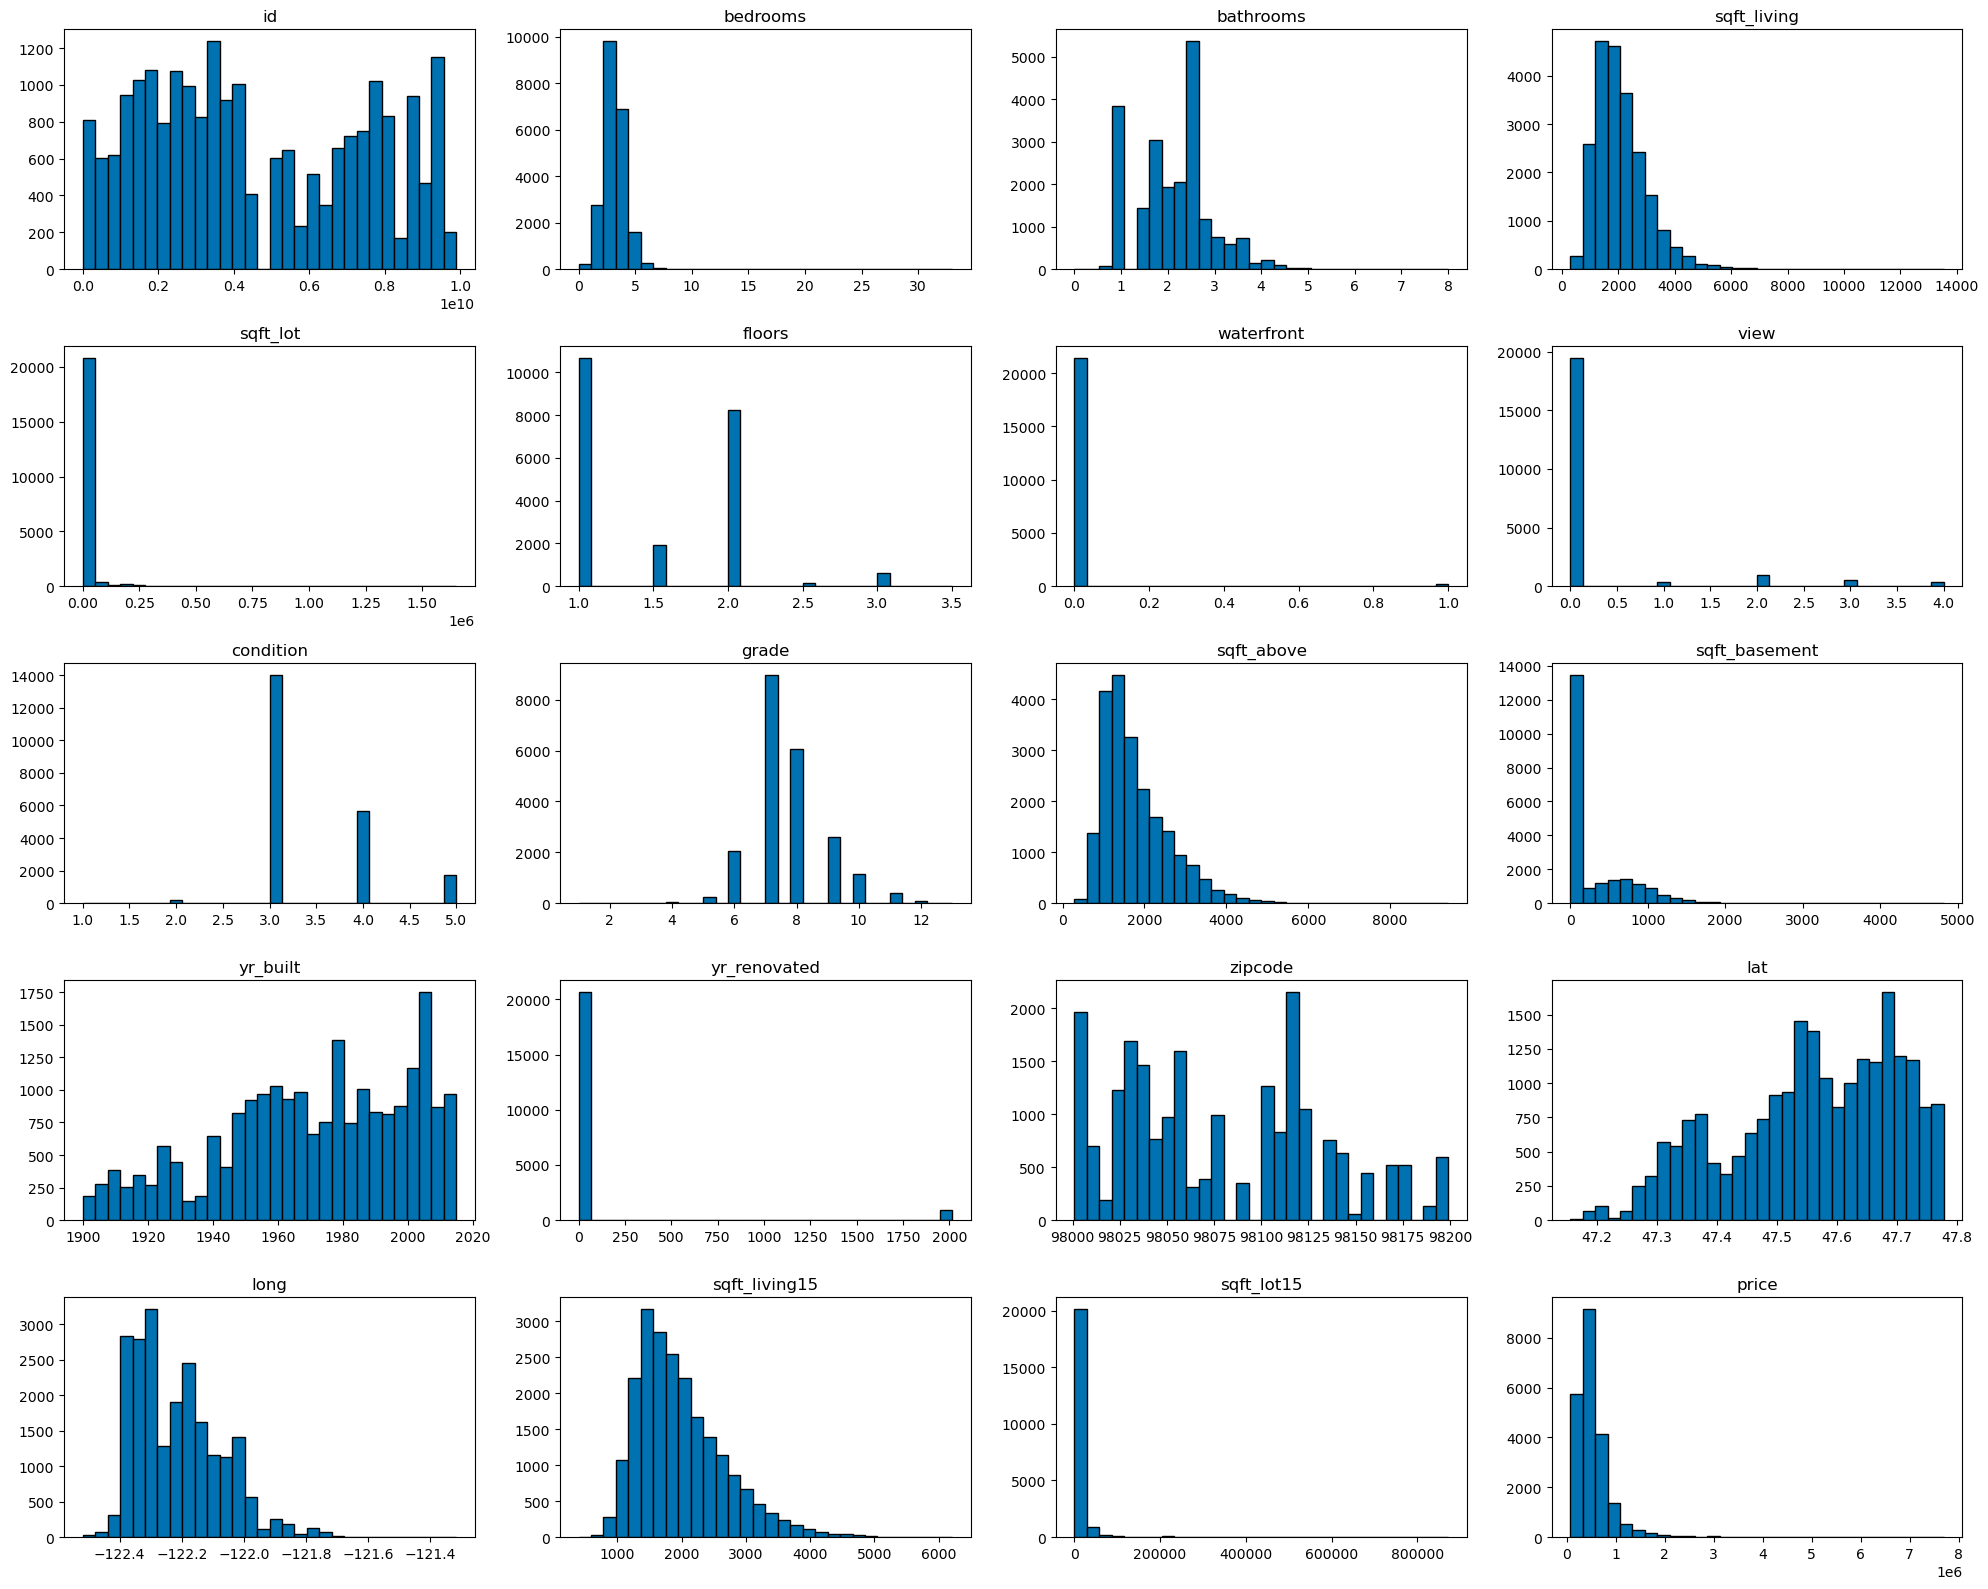

In [60]:
# histogram for all numberical columns

color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

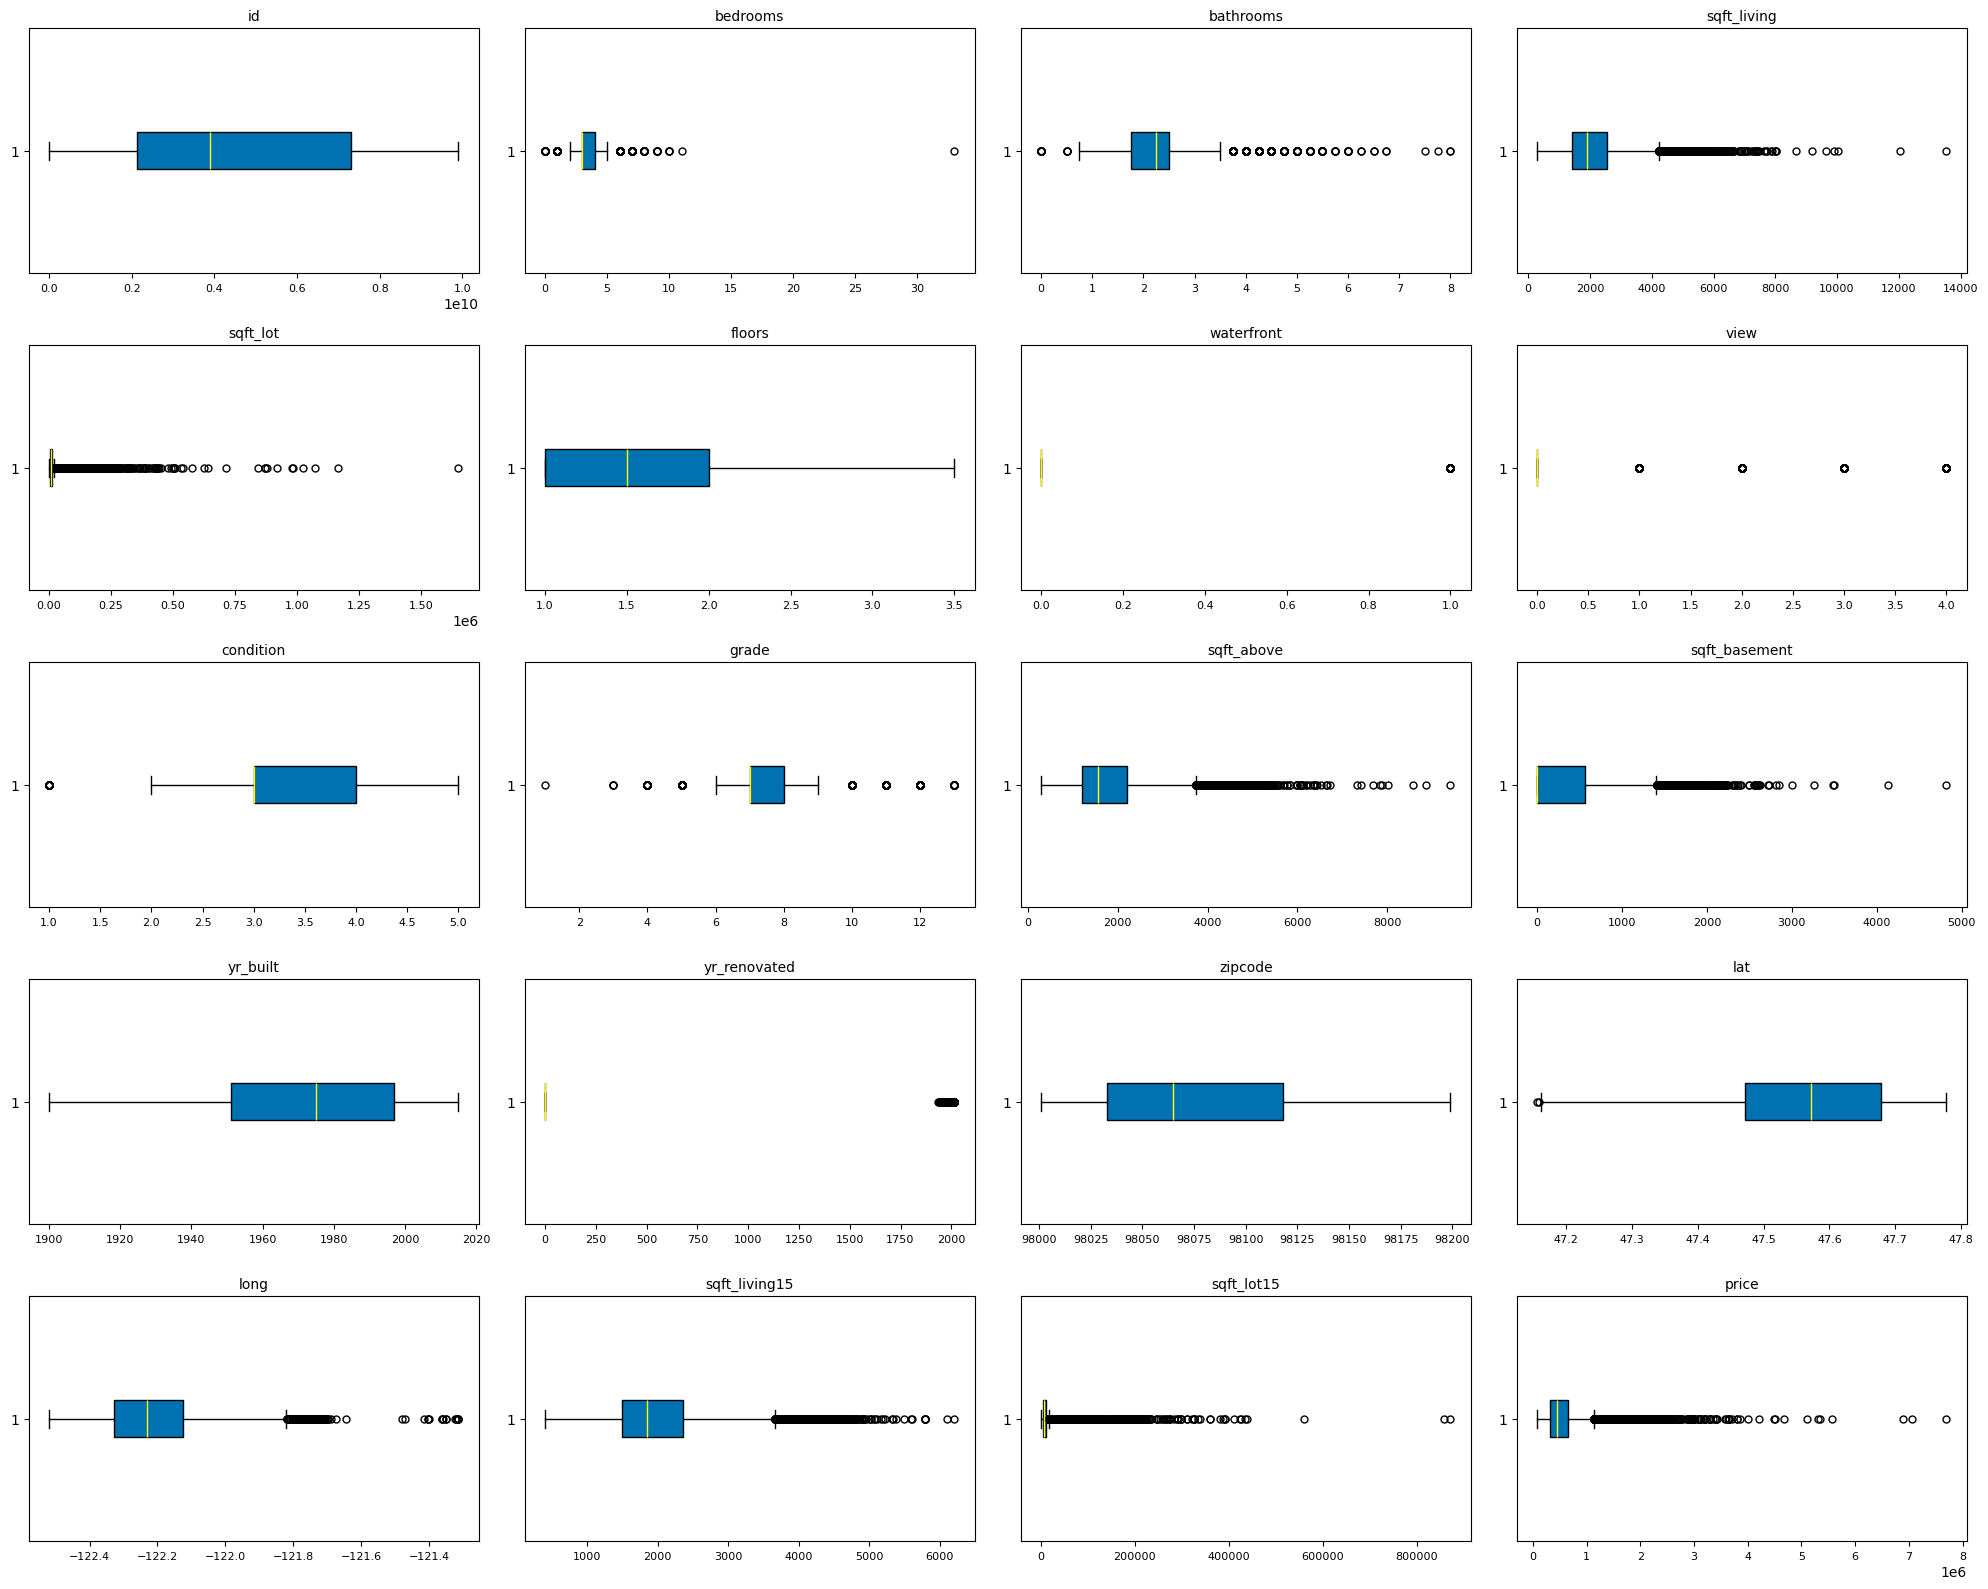

In [62]:
# boxplots for all num columns

color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h3 style="color: #ec1139;">Conclusions on Categorical Data</h3>

***Impressions from the Diagramms***

- Columns .... seem to be categorical data

<h2 style="color: #ec7511;">Feature Selection</h2>

Grounds on which to delete columns:

- Checking null values to drop a column
- Sense check to drop columns that are not significant
- Using heat maps to check multicollinearity for numerical variables
- Chi-square tests for categorical variables



<h3 style="color: #ec7511;">Separating Categorical Data</h3>

In [ ]:
# potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

<h2 style="color: #ec7511;">Looking for Correlations</h2>

In [ ]:
num_corr = round(num.corr(), 2)

<div class="alert alert-block alert-warning">
Checking for <b>multicollinearity</b>
    
- We don't want multicollinearity, we are checking here
- We do want: High correlations (+ or -) with the target!</div>

In [ ]:
# Correlation Matrix-Heatmap Plot which shows only half of numbers (so no doubles)
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Exercise 4: How to interpret this correlation matrix? Which other correlation methods we know?

### Specific Correlations with the Target

### Perform 3 Plots and Explain the Findings from the Data

### Contigency Tables, Chi-Square...

<h1 style="color: #e3db24;">04 | Data Processing</h1>

<h2 style="color: #ec7511;">X-Y Split</h2>

<h2 style="color: #ec7511;">Normalizing the Data</h2>

<h1 style="color: #e3db24;">05 | Modeling</h1>

<h2 style="color: #ec7511;">Train-Test Split</h2>

<h2 style="color: #ec7511;">Model Validation</h2>

regression metrics erklären, scale von RMSE and MAE (?) same as data

- erklären, warum wir welches Regressionsmodell genutzt haben (linear, lasso, decision trees, KNN, Ridge, XGBoost ...)
- kaggle und github "house prices" suchen und andere Notebooks angucken
- am Ende: grid search hilft bei erster Sache: welche metrics sind die besten?

<h1 style="color: #e3db24;">06 | Improving the Model</h1>

<h1 style="color: #e3db24;">07 | Reporting</h1>